**Thinks Stats Exercises**

In [52]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import nsfg
import first
import thinkstats2
import thinkplot
import math

**Exercise 2-4**

In [53]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

I was playing around with the chapter content and curious to look at what the histogram of the babies total weight looked like. 

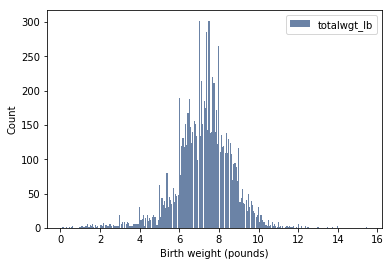

In [54]:
hist = thinkstats2.Hist(live.totalwgt_lb, label='totalwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

I was also curious to see what the histograms of first babies' to the rest of the babies' histograms looked like side-by-side. 

Was there any obvious difference? It seems not.

In [55]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.totalwgt_lb, label='first')
other_hist = thinkstats2.Hist(others.totalwgt_lb, label='other')

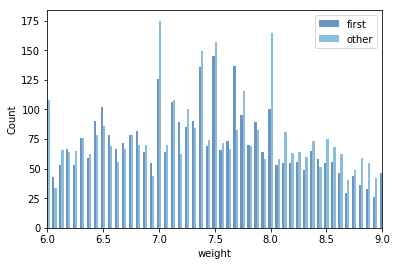

In [56]:
width = 0.02
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weight', ylabel='Count', xlim=[6, 9])

Then I calculated the Cohen's d to quantify the difference between the first born babies and the other babies weights, and the difference between the first born babies and other babies preganancy lengths. 

In [57]:
first_wgt = firsts.totalwgt_lb
others_wgt = others.totalwgt_lb

In [58]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [59]:
wgt_cohen = CohenEffectSize(first_wgt, others_wgt)

In [60]:
first_length = firsts.prglngth
others_length = others.prglngth

In [61]:
length_cohen = CohenEffectSize(first_length, others_length)

In [62]:
diff = abs(wgt_cohen)-length_cohen

In [63]:
print ('cohen wgt: ' + str(wgt_cohen))
print ('cohen length: ' + str(length_cohen))
print ('difference: ' + str(diff))

cohen wgt: -0.088672927072602
cohen length: 0.028879044654449883
difference: 0.059793882418152124


The difference between the two cohen's d calculations is not very big. It's around .06. 

Both cohen's d are very small - meaning there is a small effect size. 

This suggests there is most likely no significant difference between pregnancy length in first born babies vs. other babies, as well as no significant difference between total weight of first born babies vs. other babies.

______________________________________________________________________________________________________

**Exercise 3-1**

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb.

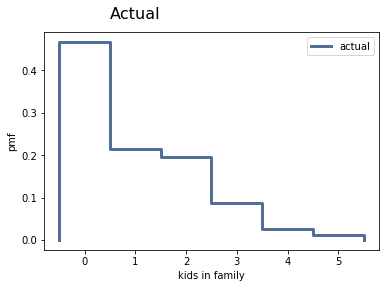

In [81]:
resp = nsfg.ReadFemResp()

pmf = thinkstats2.Pmf(resp.numkdhh, label='actual')

def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)
    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
    new_pmf.Normalize()
    return new_pmf

biased = BiasPmf(pmf, label='biased')

thinkplot.Pmf(pmf)
thinkplot.Text(.5, .55, 'Actual')
thinkplot.Config(xlabel='kids in family', ylabel='pmf')


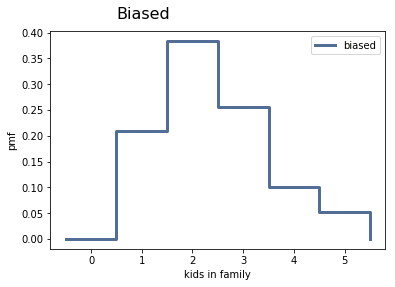

In [86]:
thinkplot.Pmf(biased)
thinkplot.Text(.5, .45, 'Biased')
thinkplot.Config(xlabel='kids in family', ylabel='pmf')

In [91]:
mean_actual = pmf.Mean()
mean_biased = biased.Mean()
print('The mean of the actual distribution is ' + str(mean_actual)+ '. The mean of the biased distribution is '+ str(mean_biased)+'.')

The mean of the actual distribution is 1.02420515504. The mean of the biased distribution is 2.40367910066.


**Exercise 4-2**

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

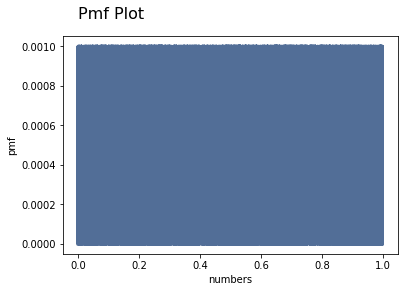

In [115]:
import random

l = []
for x in range(1000):
    r = random.random()
    l.append(r)

pmf_random= thinkstats2.Pmf(l)

thinkplot.Pmf(pmf_random)
thinkplot.Text(.0012,.0012, 'Pmf Plot')
thinkplot.Config(xlabel='numbers', ylabel='pmf')

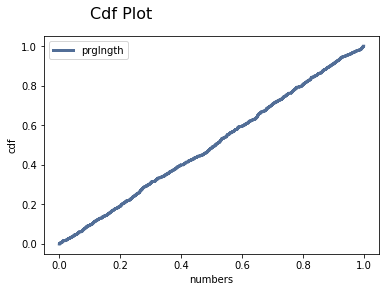

In [122]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

cdf = thinkstats2.Cdf(l, label='prglngth')
thinkplot.Cdf(cdf)
thinkplot.Text(.1,1.2, 'Cdf Plot')
thinkplot.Config(xlabel='numbers', ylabel='cdf')

The distribution of the numbers is uniform. That means every value in the range has the same the same chance of being generated by random.random().

**Exercise 5-1**

In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters μ = 178 cm and σ = 7.7 cm for men, and μ = 163 cm and σ = 7.3 cm for women.
In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

Thought Process:

The distribution of heights for men is roughly normal. This means that I need to evaluate the normal cdf for male heights 5'10" and 6'1". The difference between these two evaluations should be the percentage of the male population in this range. This is because the CDF shows the percentage of men at the height specified and lower. 

In [127]:
import scipy.stats
scipy.stats.norm.cdf(0)

def EvalNormalCdf(x, mu=0, sigma=1):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

maleone = 5*12*2.54+10*2.54 
maletwo = 6*12*2.54 +1*2.54
diff = EvalNormalCdf(maletwo, 178, 7.7) - EvalNormalCdf(maleone, 178, 7.7)
print(diff)

0.342746837631


Approxmately 34.3% of the male population fall within the range that the Blue Man Group casting specifications require. 

**Q6**

Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? Assume we observe the following probabilities in the population: fraternal twin is 1/125 and identical twin is 1/300.

Thought Process:

Probability of being born a twin in the population = 
    Probability of being born a fraternal twin in pop + Probability of being born an identical twin in pop
    
Probability of brother being a twin = 100% because it already happened.

Therefore probability of brother being an identical twin = 
    [(Probability of being born an identical twin in pop)/(Probability of being born a twin in pop)] * 100

In [129]:
x = ((1/300)/(1/300+1/125))*100
print(x)

29.411764705882355


The probability of Elvis' brother was an identical twin is approximately 29.41%.

**Q7**


How do frequentist and Bayesian statistics compare?

Maybe you could say that a frequentist attempts to find "absolute" probabilities", compared to a Bayesianist who attempts to find "relative" probabilities. 

The frequentist looks to figure out the frequency of an event's occurence. The frequentist finds this probability of an event occuring measurable and observable based on different rules (pre-set parameters) about the event. He finds this probability exists independently of the person calculating it. 

The Bayesian statistician, on the other hand, believes that data can only be observed from a realized sample. According the the Bayensianist, the rules governning an event (those 'pre-set' parameters) are actually unknown and only described probabalistically.

So, the frequentist sees underlying parameters that govern an event as remaining constant. The process is repeatable to infinite and the parameters are fixed. The probability of an event occuring is calculated based off of these fixed parameters and nothing else. The Bayesian, on the other hand, admits the underlying parameters governing an event are unknown and believes that only the obserable dataset is fixed. The Bayesian calculates the probability of an event occuring based off of this data. Because the individual calculating the probability may have an impact on the observable data collected, that individual may also have an impact on the statistic found.

